In [1]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
# allandok
scu = 5.333*10**(-5) # m, skalaegyseg

d = 6*10**(-3) # m
ro_o = 875 # kg/m^3 olaj surusege
ro_l = 1.29 # kg/m^3 levego surusege

eta_0 = 1.708*10**(-5) #Pa*s
C = 113 # K
T_0 = 273 # K
g = 9.80665 # m/s^2

K = 8.26*10**(-3) # Pa*m

# kiserlet korulmenyei
T = 296 # K
p = 1016*100 # Pa, 1016hPa

# levego viszkozitasa korrigalva
eta = eta_0*sqrt(T/T_0)*(1+C/T_0)/(1+C/T)

# mert adatok
# tererosseg nelkul
t_0 = [] # sec
s_0 = [] # beosztas
# tererosseg mellett
U = [] # V, tererosseg
t_E = []  # sec
s_E = []  # beosztas

# mert adatok feltoltese
adatok = loadtxt("csepp_adatok.txt", skiprows=1)

for sor in adatok:
    s_0.append(sor[0])
    t_0.append(sor[1])
    U.append(sor[2])
    s_E.append(sor[3])
    t_E.append(sor[4])

#skala atszamitasa m-be
s_1 = [s*scu*10 for s in s_0] # 10 egyseg egy nagy egyseg
s_E1 = [s*scu*10 for s in s_E]

# sebessegek...
v_0 = [s/t for s, t in zip(s_1, t_0)]
v_E = [s/t for s, t in zip(s_E1, t_E)]

# sugarak kiszamitasa
def sugaratSzamol (v) :
    return sqrt(9*eta*v/ (2*(ro_o - ro_l)*g))
r = [sugaratSzamol(v) for v in v_0]

#kiiratas
print("n\tsugár\tt_esés\tt_elmelk.");
print("------------------------------");
for i in range(len(r)):
    print("%d.\t%.3f\t%.2f\t%.2f"% (i, r[i]*10**6, t_0[i], t_E[i])); # mikrometerben kiirt meret

n	sugár	t_esés	t_elmelk.
------------------------------
0.	0.742	37.06	16.73
1.	0.327	95.47	12.75
2.	0.344	128.90	9.68
3.	0.485	65.10	22.31
4.	0.508	59.19	25.94
5.	0.498	61.62	26.22
6.	0.517	47.72	25.43
7.	0.864	20.50	7.68
8.	0.494	62.75	19.25
9.	0.603	42.00	14.82
10.	0.508	39.48	18.63
11.	0.505	60.08	25.91
12.	0.795	24.20	27.40
13.	0.678	33.25	56.90
14.	0.770	34.35	10.81
15.	0.701	31.10	15.32
16.	0.695	31.62	21.17
17.	0.542	52.13	23.96
18.	0.542	52.03	22.53
19.	0.542	52.06	23.52
20.	0.757	35.54	9.28
21.	0.702	31.06	15.86
22.	0.501	60.94	15.34
23.	0.505	59.97	26.32
24.	0.588	44.22	8.82
25.	0.441	78.68	14.59


In [3]:
print("n & egyseg & s_0 & t_0 & v_0 & egyseg & s_E & t_E & v_E & U & sugár \\\ \hline")
for i in range(len(r)):
    print("%d & %d & %.2f & %.2f & %.2f & %d & %.2f & %.2f & %.2f & %d & %.3f \\\ \hline"% ((i+1), s_0[i]*10, s_0[i]*10*scu*10**3, t_0[i], v_0[i]*10**6, s_E[i]*10, s_E[i]*10*scu*10**3, t_E[i], v_E[i]*10**6, U[i], r[i]*10**6))

n & egyseg & s_0 & t_0 & v_0 & egyseg & s_E & t_E & v_E & U & sugár \\ \hline
1 & 40 & 2.13 & 37.06 & 57.56 & -40 & -2.13 & 16.73 & -127.51 & 505 & 0.742 \\ \hline
2 & 20 & 1.07 & 95.47 & 11.17 & 50 & 2.67 & 12.75 & 209.14 & 505 & 0.327 \\ \hline
3 & 30 & 1.60 & 128.90 & 12.41 & 40 & 2.13 & 9.68 & 220.37 & 502 & 0.344 \\ \hline
4 & 30 & 1.60 & 65.10 & 24.58 & 40 & 2.13 & 22.31 & 95.62 & 502 & 0.485 \\ \hline
5 & 30 & 1.60 & 59.19 & 27.03 & 40 & 2.13 & 25.94 & 82.24 & 502 & 0.508 \\ \hline
6 & 30 & 1.60 & 61.62 & 25.96 & 40 & 2.13 & 26.22 & 81.36 & 502 & 0.498 \\ \hline
7 & 25 & 1.33 & 47.72 & 27.94 & 40 & 2.13 & 25.43 & 83.89 & 502 & 0.517 \\ \hline
8 & 30 & 1.60 & 20.50 & 78.04 & 30 & 1.60 & 7.68 & 208.32 & 502 & 0.864 \\ \hline
9 & 30 & 1.60 & 62.75 & 25.50 & 30 & 1.60 & 19.25 & 83.11 & 502 & 0.494 \\ \hline
10 & 30 & 1.60 & 42.00 & 38.09 & 40 & 2.13 & 14.82 & 143.94 & 502 & 0.603 \\ \hline
11 & 20 & 1.07 & 39.48 & 27.02 & 30 & 1.60 & 18.63 & 85.88 & 502 & 0.508 \\ \hline
12 & 30 & 1

$$\frac{4}{3}\pi r^3(\rho_o-\rho_l)g=6\pi\eta r v_0\frac{1}{1+\frac{K}{pr}}$$
$$r^2(\rho_o-\rho_l)g+r(\rho_o-\rho_l)\frac{gK}{p}-\frac{9}{2}\eta v_0=0$$

In [18]:
# toltes meghatarozasa
a=(ro_o-ro_l)*g #masodfoku egyenlet egyutthatoi
b=(ro_o-ro_l)*g*K/p
c=[0]*len(r)
q=[0]*len(r)
r_korr=[0]*len(r) #korrigalom a sugarat is
F_surl_korr=[0]*len(r)
F_surl_korr2=[0]*len(r)
F_fel_grav=[0]*len(r)

for i in range(len(r)):
    # korrigalt surlodasi ero
    F_surl_korr[i] = 6*pi*eta*r[i]*v_E[i]/(1+K/(p*r[i]))
    #masodfoku egyenlet 3. egyutthatoja
    c[i]=-9/2*eta*v_0[i]
    #korrigalt sugar
    r_korr[i]=(-b+sqrt(b**2-4*a*c[i]))/(2*a)
    # surlodasi ero masodik korrekcioja
    F_surl_korr2[i]=6*pi*eta*r_korr[i]*v_E[i]/(1+K/(p*r_korr[i]))
    # felhajtoero es gravitacios ero
    F_fel_grav[i] = 4/3*pi*r_korr[i]**3*(ro_o-ro_l)*g
    
    q[i] = (d/U[i])*(F_surl_korr2[i]+F_fel_grav[i])

In [25]:
#kiiratas
print("n & $r_korr\ [\mu m]$ & F_{surl}\ [N] & F_{grav_felh}\ [N] & q\ [10^{-19}]\ C] \\\ \hline")

for i in range(len(q)):
    print("%d & %.3f & %.3f & %.3f & %.3f \\\ \hline"% ((i+1), r_korr[i]*10**6, F_surl_korr[i]*10**12, F_fel_grav[i]*10**12, q[i]*10**19))

n & $r_korr\ [\mu m]$ & F_{surl}\ [N] & F_{grav_felh}\ [N] & q\ [10^{-19}]\ C] \\ \hline
1 & 0.702 & -0.029 & 0.012 & -1.794 \\ \hline
2 & 0.289 & 0.019 & 0.001 & 2.022 \\ \hline
3 & 0.306 & 0.021 & 0.001 & 2.309 \\ \hline
4 & 0.446 & 0.014 & 0.003 & 1.858 \\ \hline
5 & 0.469 & 0.012 & 0.004 & 1.792 \\ \hline
6 & 0.459 & 0.012 & 0.003 & 1.717 \\ \hline
7 & 0.478 & 0.013 & 0.004 & 1.872 \\ \hline
8 & 0.824 & 0.056 & 0.020 & 8.806 \\ \hline
9 & 0.455 & 0.012 & 0.003 & 1.718 \\ \hline
10 & 0.564 & 0.026 & 0.006 & 3.680 \\ \hline
11 & 0.469 & 0.013 & 0.004 & 1.851 \\ \hline
12 & 0.465 & 0.012 & 0.004 & 1.774 \\ \hline
13 & 0.755 & 0.014 & 0.015 & 3.488 \\ \hline
14 & 0.639 & 0.006 & 0.009 & 1.775 \\ \hline
15 & 0.731 & 0.047 & 0.014 & 7.038 \\ \hline
16 & 0.662 & 0.023 & 0.010 & 3.774 \\ \hline
17 & 0.656 & 0.022 & 0.010 & 3.637 \\ \hline
18 & 0.502 & 0.011 & 0.005 & 1.735 \\ \hline
19 & 0.503 & 0.011 & 0.005 & 1.807 \\ \hline
20 & 0.503 & 0.011 & 0.005 & 1.753 \\ \hline
21 & 0.718 & 0.054

In [26]:
el=linspace(1.6*10**(-19),2*10**(-19),401)
#lusta modon szemmel megneztem, hogy kb. hanyszorosa az elemi toltesnek (vagy mivel az itt meg ismeretlen, ezert az itteni
#legkisebb erteknek)
N=[-1,1,1,1,1,1,1,5,1,2,1,1,2,1,4,2,2,1,1,1,4,2,1,1,3,1]

In [27]:
#f(x)
f=[0]*len(el)
for i in range (len(el)):
    for j in range(len(N)):
        f[i]=sum(sin(pi*q[j]*N[j]/el[i])**2)

In [28]:
#min.hely megkeresese
kis=f[0]
pos=0
for i in range(len(f)):
    if f[i]<kis:
        kis=f[i]
        pos=i
        
print("Az elemi toltes nagysaga",el[pos],"C")

Az elemi toltes nagysaga 1.793e-19 C


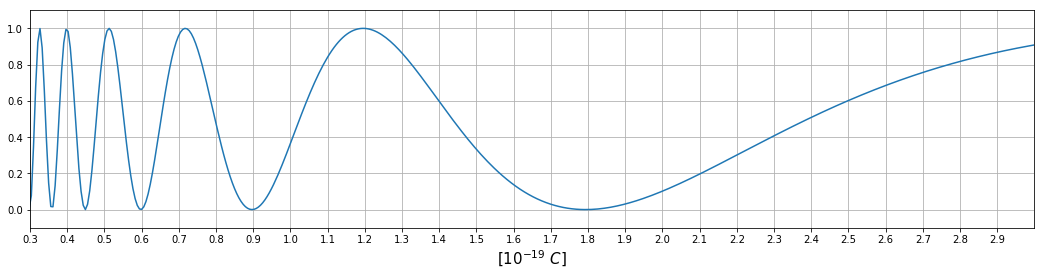

In [35]:
xx=linspace(10**(-20),3*10**(-19), 500)
fx=[0]*len(xx)
for i in range (len(xx)):
    for j in range(len(N)):
        fx[i]=sum(sin(pi*q[j]*N[j]/xx[i])**2)

figsize(18, 4)
ylim(-0.1, 1.1)
xticks(arange(30)/10)
xlim(0.3, 3)
xlabel(r'[$10^{-19}\ C$]', fontsize = 15)
grid(True)
plot(xx*10**(19), fx);

savefig('mill_scaled.png')

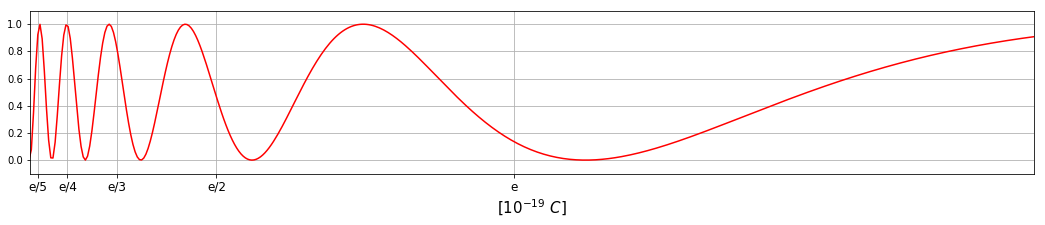

In [33]:
figsize(18, 3)
#xlim(10**(-20),3*10**(-19))
ylim(-0.1, 1.1)
ue = 1.602176620810
e_mertek = [ue/i for i in range(1, 6)]
e_label = ["e"]
e_label += ["e/" +str(i) for i in range(2, 6)]
xticks(e_mertek, e_label, fontsize = 12)
xlim(0.3, 3)
xlabel(r'[$10^{-19}\ C$]', fontsize = 15)
grid(True)
plot(xx*10**(19), fx, 'r');

savefig('mill_charge.png')